# In this Notebook:
- We define global setting for plotting with Seaborn with a custom color palette
containing the colors to be same as our presentation layout
- Create several plots to visualize the relationship between animals age and the adoption speed


In [31]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

# custom color palette (color codes taken from our Canva presentation layout): 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# display color palette
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

In [33]:
df = pd.read_csv('../data/petfinder-adoption-prediction/df_eda.csv')

In [34]:
df.adoptionspeed.value_counts(normalize=True)

adoptionspeed
2    0.273498
4    0.266321
1    0.239516
3    0.220666
Name: proportion, dtype: float64

In [35]:
pd.crosstab(df.query("type==1").age_bin,df.query("type==1").adoptionspeed,normalize="index")

adoptionspeed,1,2,3,4
age_bin,,,,
0,0.363981,0.328132,0.175875,0.132012
1,0.220456,0.249073,0.207207,0.323264
2,0.187982,0.206471,0.178737,0.426810
3,0.166667,0.194444,0.305556,0.333333


In [36]:
pd.crosstab(df.query("type==0").age_bin,df.query("type==0").adoptionspeed,normalize="index")

adoptionspeed,1,2,3,4
age_bin,,,,
0,0.234117,0.330686,0.265248,0.169949
1,0.150557,0.215583,0.237258,0.396602
2,0.218450,0.197309,0.210762,0.373479
3,0.135922,0.276699,0.233010,0.354369


In [37]:
dog_age = pd.crosstab(df.query("type==0").age_bin,df.query("type==0").adoptionspeed,normalize="index")
dog_age = dog_age.reset_index()
dog_age = pd.melt(dog_age, id_vars='age_bin', var_name='adoptionspeed', value_name='value')
dog_age

,age_bin,adoptionspeed,value
0,0,1,0.234117
1,1,1,0.150557
2,2,1,0.218450
3,3,1,0.135922
4,0,2,0.330686
5,1,2,0.215583
6,2,2,0.197309
7,3,2,0.276699
8,0,3,0.265248
9,1,3,0.237258


# Visual

In [38]:
from matplotlib import pyplot

<Figure size 3000x800 with 0 Axes>

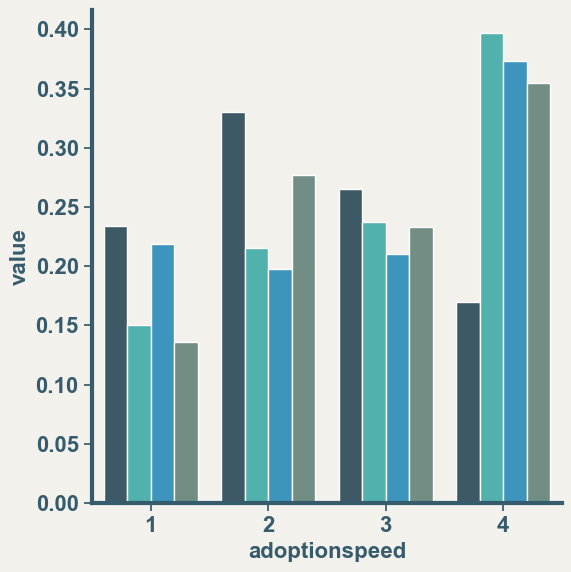

In [39]:
g = plt.figure(figsize=(30,8))
# Plot
g = sns.catplot(
    data=dog_age, kind="bar",
    x="adoptionspeed", y="value", hue="age_bin",
    alpha=1, height=6, legend=False
)

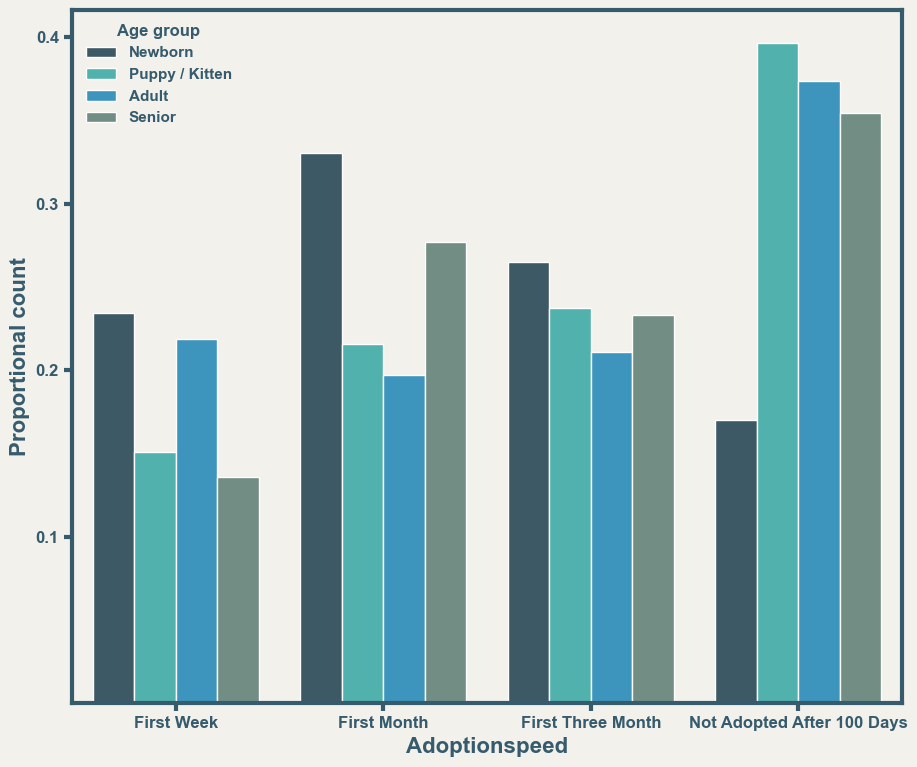

In [40]:
#sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"})  # Change the color code as needed

# Plot
g = sns.catplot(
    data=dog_age, kind="bar",
    x="adoptionspeed", y="value", hue="age_bin",
    alpha=1, height=8,aspect=1.2, legend=False
)


# Make a box around the plot, set the linewidth and color.
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(3)
ax.spines['top'].set_color('#365b6d')  

ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(3)
ax.spines['right'].set_color('#365b6d')  

ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('#365b6d')  

ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#365b6d')  

# Customize tickmarks:
# #plt.tick_params(axis='both',  # 'both' applies to both x and y axes
#                 which='both',  # 'both' applies to both major and minor ticks
#                 color='black',  # Set the tick color
#                 width=15,  # Set the tick width
#                 length=15,  # Set the tick length
#                 direction='out',  # 'in', 'out', or 'inout'
#                 )
plt.tick_params(axis="x", bottom=True, color='#365b6d',width=3) 
plt.tick_params(axis="y", left=True, color='#365b6d',width=3) 

plt.yticks(color='#365b6d',fontsize=12, ticks=[0.1,0.2,0.3,0.4],fontweight='bold')
plt.xticks(color='#365b6d',fontsize=12,fontweight='bold', ticks=[0,1,2,3], labels=['First Week', 'First Month', 'First Three Month', 'Not Adopted After 100 Days'])

legend = ax.legend(title="Age group", loc="upper left",frameon=False, labelcolor='#365b6d')
legend.get_title().set_color('#365b6d')
legend.get_title().set_fontweight('bold')
labellist = ["Newborn", "Puppy / Kitten", "Adult", "Senior"]
for i,label in enumerate(legend.get_texts()):
    label.set_weight('bold')
    label.set_text(labellist[i]) 

g.set_axis_labels("Adoptionspeed", "Proportional count", color = '#365b6d',fontweight='bold')




In [41]:
df.age_bin.value_counts()

age_bin
0    5519
1    3594
2    2210
3     242
Name: count, dtype: int64

In [42]:
dog_age

,age_bin,adoptionspeed,value
0,0,1,0.234117
1,1,1,0.150557
2,2,1,0.218450
3,3,1,0.135922
4,0,2,0.330686
5,1,2,0.215583
6,2,2,0.197309
7,3,2,0.276699
8,0,3,0.265248
9,1,3,0.237258


[None, None, None]

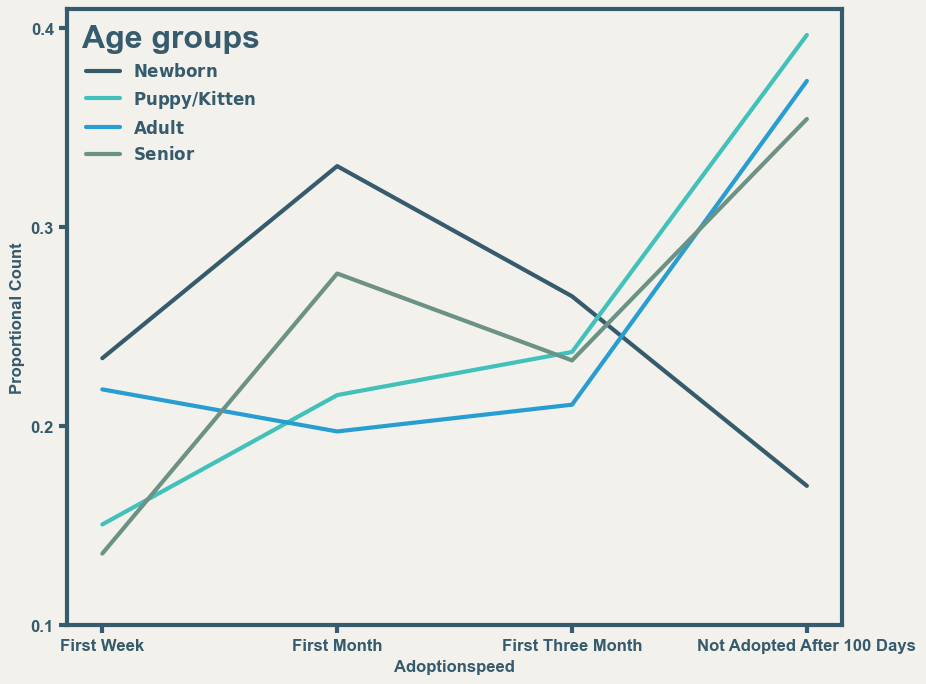

In [43]:
#sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"})  # Change the color code as needed
import matplotlib.lines as mlines
plt.figure(figsize=(10, 8)) 
# Plot
g = sns.lineplot(
    data=dog_age, 
    x="adoptionspeed", y="value", hue="age_bin", palette= ['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], linewidth = 3,
    alpha=1, legend=False
)


# Make a box around the plot, set the linewidth and color.
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['top'].set_linewidth(3)
ax.spines['top'].set_color('#365b6d')  

ax.spines['right'].set_visible(True)
ax.spines['right'].set_linewidth(3)
ax.spines['right'].set_color('#365b6d')  

ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('#365b6d')  

ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#365b6d')  

# Customize tickmarks:
# #plt.tick_params(axis='both',  # 'both' applies to both x and y axes
#                 which='both',  # 'both' applies to both major and minor ticks
#                 color='black',  # Set the tick color
#                 width=15,  # Set the tick width
#                 length=15,  # Set the tick length
#                 direction='out',  # 'in', 'out', or 'inout'
#                 )
plt.tick_params(axis="x", bottom=True, color='#365b6d',width=3) 
plt.tick_params(axis="y", left=True, color='#365b6d',width=3) 

plt.yticks(color='#365b6d',fontsize=12, ticks=[0.1,0.2,0.3,0.4],fontweight='bold')
plt.xticks(color='#365b6d',fontsize=12,fontweight='bold', ticks=[1,2,3,4], labels=['First Week', 'First Month', 'First Three Month', 'Not Adopted After 100 Days'])

# legend = ax.legend(title="Age group", loc="upper left",frameon=False, labelcolor='#365b6d')
# legend.get_title().set_color('#365b6d')
# legend.get_title().set_fontweight('bold')
# labellist = ["Newborn", "Puppy / Kitten", "Adult", "Senior"]
# for i,label in enumerate(legend.get_texts()):
#     label.set_weight('bold')
#     label.set_text(labellist[i]) 

#g.set_axis_labels("Adoptionspeed", "Proportional count", color = '#365b6d',fontweight='bold')

plt.xlabel("Adoptionspeed", fontsize=12,color = '#365b6d',fontweight='bold')
plt.ylabel("Proportional Count", fontsize=12, color = '#365b6d',fontweight='bold')


#legend_labels = ["Newborn", "Puppy / Kitten", "Adult", "Senior"]
legend_handles = [mlines.Line2D([], [], color="#365b6d", label="Newborn",linewidth=3),
                  mlines.Line2D([], [], color="#41c1ba", label="Puppy / Kitten",linewidth=3),
                  mlines.Line2D([], [], color="#289dd2", label="Adult",linewidth=3),
                  mlines.Line2D([], [], color="#6c9286", label="Senior",linewidth=3)]



legend = plt.legend(
    title='Age groups',
    frameon=False,
    handles = legend_handles,
    labels = ["$\\bf{Newborn}$", '$\\bf{Puppy/Kitten}$', '$\\bf{Adult}$', '$\\bf{Senior}$'],
    fontsize=12)

for i,label in enumerate(legend.get_texts()):
    label.set_color('#365b6d')
    #label.set_text(labellist[i]) 

plt.setp(legend.get_title(), color='#365b6d', fontsize='x-large')


In [44]:
df.columns


Index(['type', 'gender', 'maturitysize', 'furlength', 'sterilized', 'health',
       'adoptionspeed', 'color_pattern', 'breed_type', 'vaccinated_dewormed',
       'fee_bin', 'age_bin', 'photoamt_11', 'description_char'],
      dtype='object')